# Tic-Tac-Toe EndGame (Memprediksi apakah permainan akan dimenangkan oleh pemain 'x' atau tidak)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/PSD/tugas

/content/drive/MyDrive/PSD/tugas


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Bussiness Understanding

**TUJUAN ANALISIS DATA :** Analisis data Tic-TacToe EndGame ini untuk memprediksi apakah permainan akan dimenangkan oleh pemain 'x' atau tidak.

# Data Understanding

**DATASET**

In [ ]:
url = "https://raw.githubusercontent.com/jennamacwe/ProyekSainData/main/tic-tac-toe_Endgame2.csv"
dataset = pd.read_csv(url, header=None)

# Menambahkan kolom
dataset.columns = ["top-left-square", "top-middle-square", "top-right-square", "middle-left-square", "middle-middle-square", "middle-right-square", "bottom-left-square", "bottom-middle-square", "bottom-right-square", "Class"]
# Menampilkan dataset dengan kolom tambahan
print(dataset)


    top-left-square top-middle-square top-right-square middle-left-square  \
0                 x                 x                x                  x   
1                 x                 x                x                  x   
2                 x                 x                x                  x   
3                 x                 x                x                  x   
4                 x                 x                x                  x   
..              ...               ...              ...                ...   
953               o                 x                x                  x   
954               o                 x                o                  x   
955               o                 x                o                  x   
956               o                 x                o                  o   
957               o                 o                x                  x   

    middle-middle-square middle-right-square bottom-left-square  \
0       

**PENJELASAN DATASET :**
Dataset ini merupakan kumpulan lengkap konfigurasi papan di akhir permainan tic-tac-toe, di mana 'x' diasumsikan bermain terlebih dahulu. Konsep targetnya adalah 'kemenangan untuk x' (membuat 'tiga berjejer').

Dalam permainan Tic-Tac-Toe, ada dua pemain, biasanya disebut 'x' dan 'o,' yang bergiliran menempatkan tanda mereka di papan permainan 3x3. Tujuan permainan adalah mencapai 'win for x,' yang berarti pemain 'x' harus berhasil menciptakan salah satu dari 8 kemungkinan cara untuk mencapai 'three-in-a-row,' yaitu menempatkan tiga tanda 'x' secara berurutan dalam satu baris, kolom, atau diagonal.

Deskripsi tersebut mencatat bahwa Dataset ini mencakup semua konfigurasi papan pada akhir permainan Tic-Tac-Toe, dengan asumsi bahwa 'x' selalu bermain pertama.

Ini adalah tugas klasifikasi di mana model pembelajaran mesin mencoba memprediksi hasil permainan, yaitu apakah 'x' akan memenangkan permainan atau tidak.

**Tipe Data: Categorical**

**Subject Area : Game**

**jumlah data : 958 baris**

**Dataset ini TIDAK MEMILIKI Missing Values** yang berarti bahwa setiap bagian data pada dataset lengkap dengan informasi.

### **Penjelasan Fitur**

Jumlah Fitur : 9 (setiap fitur mempresentasikan setiap kotak pada permainan)
* top-left-square : kotak pada bagian kiri baris teratas
* top-middle-square : kotak pada bagian tengah baris teratas
* top-right-square : kotak pada bagian kanan baris teratas
* middle-left-square : kotak pada bagian kiri baris tengah
* middle-middle-square : kotak pada bagian tengah baris tengah
* middle-right-square : kotak pada bagian kanan baris tengah
* bottom-left-square : kotak pada bagian kiri baris bawah
* bottom-middle-square : kotak pada bagian tengah baris bawah
* bottom-righ-square : kotak pada bagian kiri baris bawah

**SUMBER DATASET:  
https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgam**

**Eksplorasi Data**

Menampilkan grafik jumlah per kelas (negatif dan positif) dari dataset

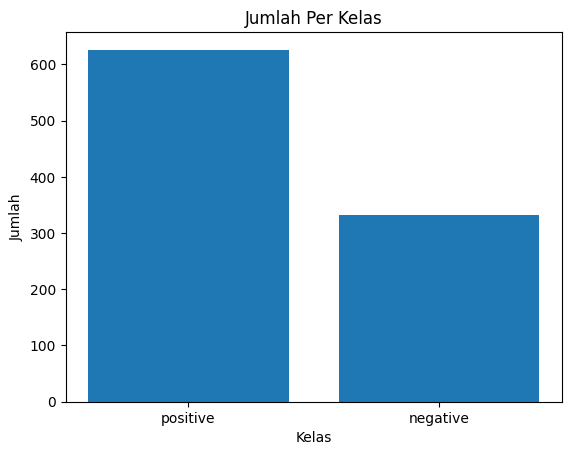

In [ ]:
# Menghitung jumlah per kelas
class_counts = dataset['Class'].value_counts()

# Plot grafik jumlah per kelas
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Jumlah Per Kelas')
plt.show()

# Pre-Processing

**mengubah categorical menjadi numerik menggunakan Label Encoding**

Label encoding adalah suatu metode dalam pra-pemrosesan data yang melibatkan penggantian nilai-nilai kategori pada suatu fitur dengan nilai-nilai numerik yang unik.

**Mengubah categorical menjadi numerik menggunakan Label Encoding dilakukan** karena sebagian besar algoritma machine learning memerlukan input yang bersifat numerik. Beberapa algoritma, terutama yang berbasis pada perhitungan jarak (seperti k-Nearest Neighbors), dapat memberikan hasil yang lebih baik jika nilai kategorikal diubah menjadi bentuk numerik. Hal ini karena perhitungan jarak lebih mudah dilakukan pada data numerik.

**catatan** : Karena fitur-fitur ini berada dalam rentang yang sangat terbatas (hanya 1, 0, dan -1), normalisasi tidak diperlukan. Normalisasi biasanya digunakan  pada data numerik yang memiliki rentang nilai yang berbeda agar fitur-fitur tersebut memiliki skala yang serupa.

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=670, test_size=288, random_state=42)

In [ ]:
# Mengimpor data CSV tanpa nama kolom (header)
data = pd.read_csv(url, header=None)

# Memberikan kolom pada dataset
column_names = ["top-left-square", "top-middle-square", "top-right-square", "middle-left-square", "middle-middle-square", "middle-right-square", "bottom-left-square", "bottom-middle-square", "bottom-right-square", "Class"]
data.columns = column_names

# Mapping karakter ke angka (label encoding)
char_to_num = {'x': 1, 'o': 0, 'b': -1}

In [ ]:
# Melakukan encoding untuk data train
encoded_data_train = []

# Mengonversi setiap baris dalam DataFrame X_train menjadi karakter dan menyimpannya dalam encoded_data_train
for index, row in X_train.iterrows():
    encoded_row = [char_to_num[c] for c in row]
    encoded_data_train.append(encoded_row)

# Membuat DataFrame dari data train yang telah diencode
encoded_df_train = pd.DataFrame(encoded_data_train, columns=X_train.columns)

# Menampilkan DataFrame data train yang sudah diencode
print("Data Train yang sudah diencode:")
print(encoded_df_train)

Data Train yang sudah diencode:
     top-left-square  top-middle-square  top-right-square  middle-left-square  \
0                  1                 -1                 1                   0   
1                  0                  1                 0                   1   
2                  1                 -1                 1                  -1   
3                  1                  0                -1                   0   
4                  1                  1                 0                   1   
..               ...                ...               ...                 ...   
665                1                  1                -1                   0   
666                1                 -1                 0                  -1   
667                0                 -1                 1                   0   
668                0                 -1                 1                   0   
669                1                  1                -1                   1

In [ ]:
# Melakukan encoding untuk data test
encoded_data_test = []

# Mengonversi setiap baris dalam DataFrame X_train menjadi karakter dan menyimpannya dalam encoded_data_train
for index, row in X_test.iterrows():
    encoded_row = [char_to_num[c] for c in row]
    encoded_data_test.append(encoded_row)

# Membuat DataFrame dari data test yang telah diencode
encoded_df_test = pd.DataFrame(encoded_data_test, columns=X_test.columns)

# Menampilkan DataFrame data test yang sudah diencode
print("Data Test yang sudah diencode:")
print(encoded_df_test)

Data Test yang sudah diencode:
     top-left-square  top-middle-square  top-right-square  middle-left-square  \
0                  0                  0                 0                  -1   
1                  0                 -1                -1                   1   
2                  0                  1                -1                   1   
3                 -1                  1                 0                   1   
4                  0                 -1                 1                   1   
..               ...                ...               ...                 ...   
283               -1                  1                 0                   0   
284                0                  1                -1                   0   
285                1                  1                 0                   1   
286                0                  0                 1                  -1   
287                0                  1                 1                   1 

**menyimpan dataset yang telah di encoding ke csv dan pickle**

In [ ]:
import pickle

# Menyimpan DataFrame data train dan data test yang sudah diencode ke file CSV
encoded_df_train.to_csv("encoded_data_train.csv", index=False)
encoded_df_test.to_csv("encoded_data_test.csv", index=False)

# Menyimpan data train yang sudah diencode ke dalam file pickle
with open('encoded_data_train.pkl', 'wb') as file:
    pickle.dump(encoded_df_train, file)

# Menyimpan data test yang sudah diencode ke dalam file pickle
with open('encoded_data_test.pkl', 'wb') as file:
    pickle.dump(encoded_df_test, file)

# print("Data yang sudah diencoding telah disimpan ke CSV")

In [ ]:
# Membaca data train yang sudah diencode dari file pickle
with open('encoded_data_train.pkl', 'rb') as file:
    loaded_encoded_df_train = pickle.load(file)

# Membaca data test yang sudah diencode dari file pickle
with open('encoded_data_test.pkl', 'rb') as file:
    loaded_encoded_df_test = pickle.load(file)


# K-NN

In [ ]:
# Membangun model K-NN
# Hitung akurasi KNN dari k = 1 hingga 30
import numpy as np

k = 30
acc = np.zeros((k - 1))

for n in range(1, k, 2):
    knn = KNeighborsClassifier(n_neighbors=n, metric="euclidean").fit(loaded_encoded_df_train, y_train)
    y_pred = knn.predict(loaded_encoded_df_test)
    acc[n - 1] = accuracy_score(y_test, y_pred)

best_accuracy = acc.max()
best_k = acc.argmax() + 1

print('Akurasi KNN terbaik adalah', best_accuracy, 'dengan nilai k =', best_k)

results_knn = pd.DataFrame({'Actual Label': y_test, 'Prediksi': y_pred})
results_knn

Akurasi KNN terbaik adalah 0.8472222222222222 dengan nilai k = 5


,Actual Label,Prediksi
836,negative,positive
477,positive,positive
350,positive,positive
891,negative,negative
855,negative,negative
...,...,...
501,positive,positive
796,negative,negative
634,negative,positive
405,positive,positive


# Naive Bayes

In [ ]:
# Inisialisasi model Naive Bayes Multinomial
nb = GaussianNB()
nb.fit(loaded_encoded_df_train, y_train)

# Lakukan prediksi pada data uji
y_pred = nb.predict(loaded_encoded_df_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

results_nb = pd.DataFrame({'Actual Label': y_test, 'Prediksi': y_pred})
results_nb

Akurasi: 0.75


,Actual Label,Prediksi
836,negative,positive
477,positive,positive
350,positive,positive
891,negative,positive
855,negative,positive
...,...,...
501,positive,positive
796,negative,negative
634,negative,negative
405,positive,positive


# Logistic Regression

In [ ]:
# Inisialisasi model Logistic Regression
logreg_model = LogisticRegression()

# Melatih model menggunakan data train yang sudah diencode
logreg_model.fit(loaded_encoded_df_train, y_train)

# Membuat prediksi menggunakan data test yang sudah diencode
y_pred = logreg_model.predict(loaded_encoded_df_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
results_lr = pd.DataFrame({'Actual Label': y_test, 'Prediksi': y_pred})
results_lr

Accuracy: 0.6909722222222222


,Actual Label,Prediksi
836,negative,positive
477,positive,positive
350,positive,positive
891,negative,positive
855,negative,positive
...,...,...
501,positive,positive
796,negative,negative
634,negative,positive
405,positive,positive


# Decision Tree

Decision tree adalah model prediktif dalam analisis data yang menggunakan struktur pohon untuk menentukan keputusan . Decision tree sering digunakan dalam klasifikasi dan regresi. Decision tree dengan teknik regresi yang paling terkenal yaitu CART (Classification and Regression Tree) yang diperkenalkan oleh Professor Breimann.

Ada beberapa tahapan yang harus dilakukan untuk membuat sebuah pohon keputusan, yaitu:

1. Menyiapkan data training yang sudah dikelompokkan ke dalam kelas-kelas tertentu.
2. Menentukan akar dari pohon keputusan.
> Akar akan diambil dari atribut yang terpilih, dengan cara menghitung nilai gain dari masing-masing atribut, nilai gain yang paling tinggi yang akan menjadi akar pertama. Tapi, sebelum menghitung nilai gain kita harus menghitung nilai entropynya terlebih dahulu (note : atribut = kolom.) Untuk menghitungnya dapat digunakan rumus berikut:

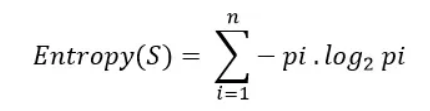

Keterangan:

S = himpunan kasus

n = jumlah partisi S

pi = proporsi Si terhadap S

3. Kemudian, hitung nilai gain menggunakan rumus:

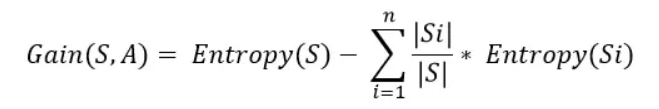

Keterangan:

S = himpunan kasus

A = fitur

n = jumlah partisi atribut A

|Si| = proporsi Si terhadap S

|S| = jumlah kasus dalam S

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membangun model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(loaded_encoded_df_train, y_train)

# Melakukan prediksi
y_pred = dt.predict(loaded_encoded_df_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')


results_compare = pd.DataFrame({'Actual Label': y_test, 'Prediksi': y_pred})
results_compare

Akurasi: 0.92


,Actual Label,Prediksi
836,negative,negative
477,positive,positive
350,positive,positive
891,negative,negative
855,negative,negative
...,...,...
501,positive,positive
796,negative,negative
634,negative,negative
405,positive,positive


# Model DT

In [ ]:
# Membangun model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(loaded_encoded_df_train, y_train)

# dt.fit(loaded_encoded_df_train.drop('Class', axis=1), loaded_encoded_df_train['Class'])

# Input data untuk prediksi
user_inputs = {}
for feature in loaded_encoded_df_train.columns:
    user_input = input(f"Masukkan nilai untuk '{feature}': ")
    user_inputs[feature] = char_to_num[user_input]

# Membuat DataFrame dari input pengguna
new_data = pd.DataFrame([user_inputs])

# Melakukan prediksi CLASS untuk data baru menggunakan model yang dimuat
prediction = dt.predict(new_data)

# Menampilkan hasil prediksi
predicted_class = prediction[0]  # Menggunakan indeks 0 karena kita hanya memprediksi satu data

# Menampilkan hasil prediksi
if predicted_class == 'positive':
    print("Hasil Prediksi: Positif (Menang)")
else:
    print("Hasil Prediksi: Negatif (Kalah)")

Masukkan nilai untuk 'top-left-square': x
Masukkan nilai untuk 'top-middle-square': o
Masukkan nilai untuk 'top-right-square': x
Masukkan nilai untuk 'middle-left-square': x
Masukkan nilai untuk 'middle-middle-square': b
Masukkan nilai untuk 'middle-right-square': x
Masukkan nilai untuk 'bottom-left-square': x
Masukkan nilai untuk 'bottom-middle-square': o
Masukkan nilai untuk 'bottom-right-square': b
Hasil Prediksi: Positif (Menang)
